In [1]:
# pip install requests beautifulsoup4

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 15
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | As someone who flies relentl...
1,✅ Trip Verified | Flew with British Airways ...
2,✅ Trip Verified | Straightforward check in T...
3,Not Verified | I am beyond upset and disgusted...
4,✅ Trip Verified | I purchased round trip dir...


In [5]:
# saving our dataframe to a csv file
df.to_csv("BA_reviews.csv")


In [6]:
df = pd.read_csv("BA_reviews.csv")
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | As someone who flies relentl...
1,1,✅ Trip Verified | Flew with British Airways ...
2,2,✅ Trip Verified | Straightforward check in T...
3,3,Not Verified | I am beyond upset and disgusted...
4,4,✅ Trip Verified | I purchased round trip dir...


In [7]:
# cleaning the data
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified', '', regex=False)

df['reviews'] = df['reviews'].str.replace('Not Verified', '', regex=False)

In [8]:
df.head()

,Unnamed: 0,reviews
0,0,| As someone who flies relentlessly with Brit...
1,1,| Flew with British Airways club Europe on ...
2,2,| Straightforward check in T5. New site for...
3,3,| I am beyond upset and disgusted with the di...
4,4,| I purchased round trip direct flight busi...


In [9]:
df['reviews'] = df['reviews'].str.replace('|', '', regex=False)

# dropping the unnamed column
df = df.drop(columns=['Unnamed: 0'])

df.head()

,reviews
0,As someone who flies relentlessly with Briti...
1,Flew with British Airways club Europe on S...
2,Straightforward check in T5. New site for ...
3,I am beyond upset and disgusted with the dis...
4,I purchased round trip direct flight busin...


In [16]:
import spacy

# Load English tokenizer, POS tagger, lemmatizer, etc.
nlp = spacy.load("en_core_web_sm")

def clean_text_spacy(text):
    doc = nlp(text.lower())
    # Lemmatize and remove stop words
    text = " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])
    return text

df['cleaned_reviews'] = df['reviews'].apply(clean_text_spacy)


In [19]:
import nltk

nltk.download('brown')  # For some corpora used by TextBlob
nltk.download('wordnet')  # For lemmatization
nltk.download('omw-1.4')  # For multilingual WordNet support


[nltk_data] Downloading package brown to C:\Users\HP
[nltk_data]     FOLIO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package wordnet to C:\Users\HP
[nltk_data]     FOLIO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\HP
[nltk_data]     FOLIO\AppData\Roaming\nltk_data...


True

In [31]:
# performing sentiment analysis
from textblob import TextBlob

# Add a new column 'sentiment' to the dataframe
df['sentiment'] = df['cleaned_reviews'].apply(lambda review: TextBlob(review).sentiment.polarity)

# Categorize the sentiment
df['sentiment_category'] = df['sentiment'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))


C:\Users\HP FOLIO\AppData\Local\Temp\ipykernel_9224\179769485.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='coolwarm')


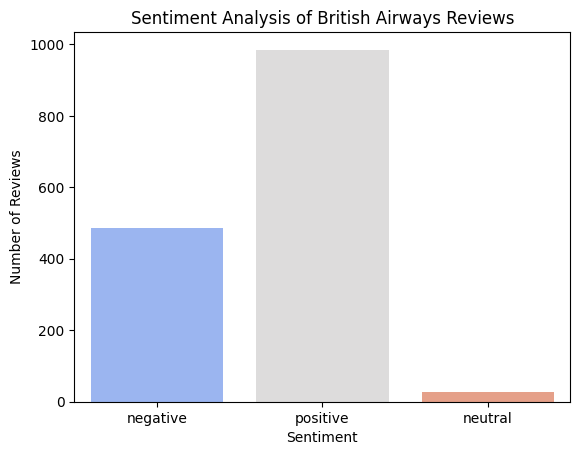

In [32]:
# visualizing the sentiment analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment categories
sns.countplot(x='sentiment_category', data=df, palette='coolwarm')
plt.title('Sentiment Analysis of British Airways Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [21]:
# performing topic modelling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df["cleaned_reviews"])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [29]:
# Print the topics
for index, topic in enumerate(lda.components_):
    print(f"TOP 10 WORDS FOR TOPIC #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


TOP 10 WORDS FOR TOPIC #0
['day', 'lose', 'fly', 'suitcase', 'travel', 'london', 'airways', 'british', 'luggage', 'bag']
TOP 10 WORDS FOR TOPIC #1
['experience', 'check', 'lounge', 'london', 'seat', 'ba', 'crew', 'food', 'flight', 'good']
TOP 10 WORDS FOR TOPIC #2
['cabin', 'london', 'staff', 'airline', 'crew', 'fly', 'service', 'ba', 'seat', 'flight']
TOP 10 WORDS FOR TOPIC #3
['cabin', 'crew', 'good', 'food', 'service', 'business', 'ba', 'class', 'flight', 'seat']
TOP 10 WORDS FOR TOPIC #4
['day', 'time', 'london', 'check', 'tell', 'service', 'customer', 'hour', 'ba', 'flight']


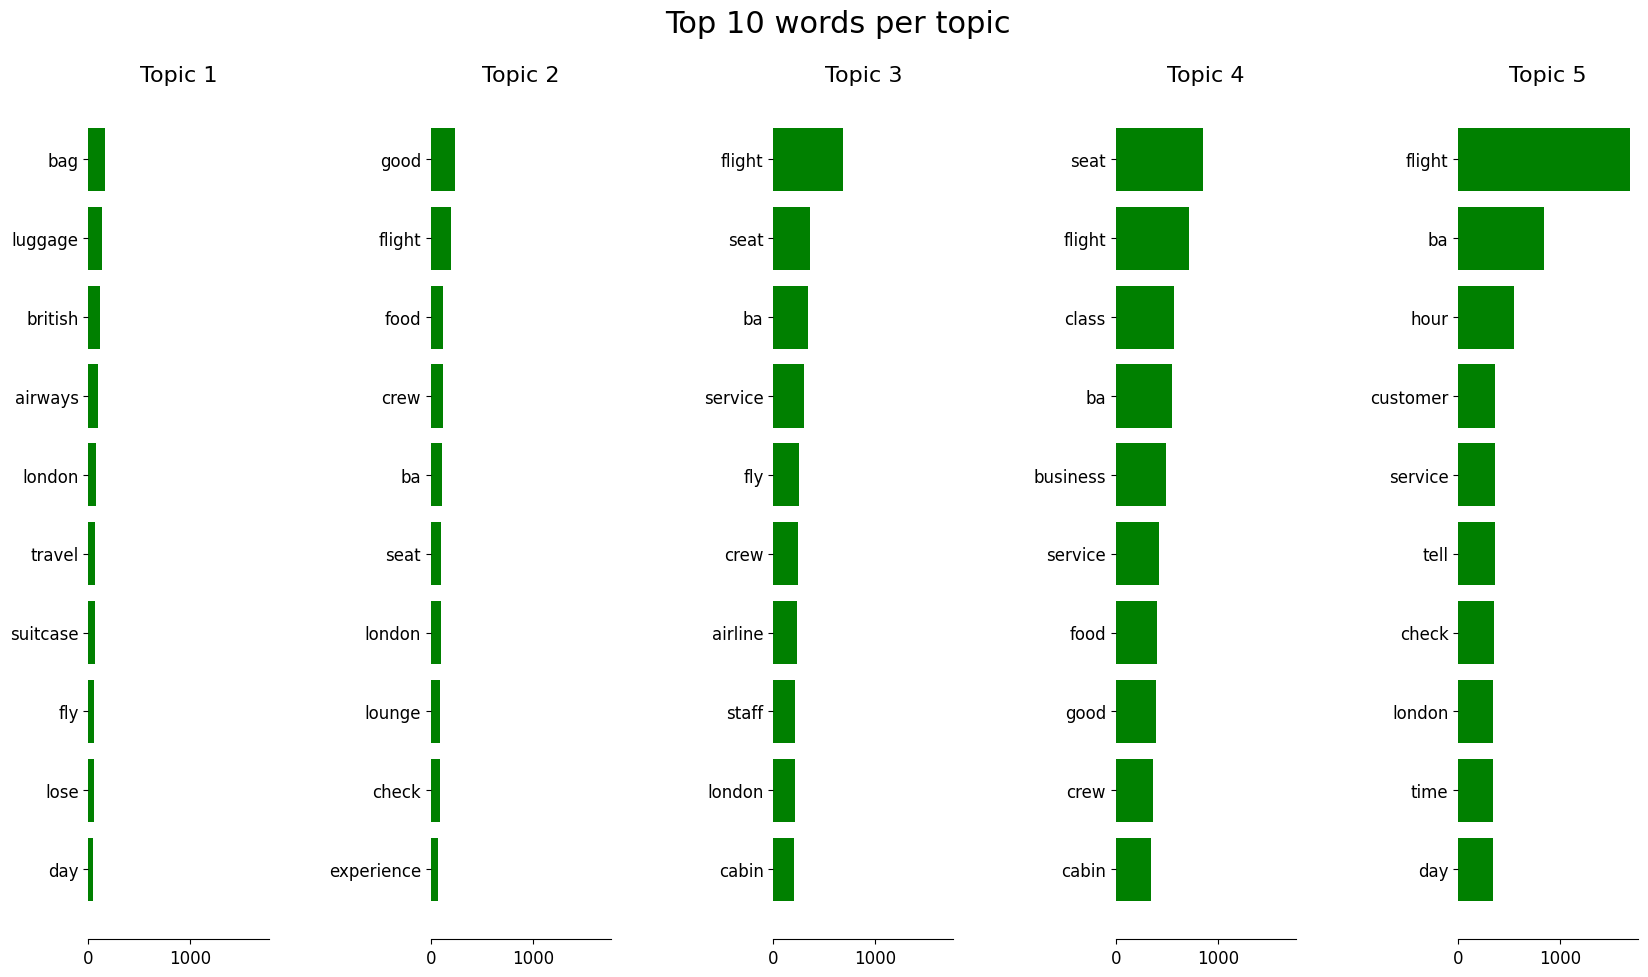

In [34]:
# visualizing topic modelling
import numpy as np

# create a function to plot the top words for each topic
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(20, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, color='green')
        ax.set_title(f'Topic {topic_idx + 1}', fontsize=16)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
    fig.suptitle(title, fontsize=22)
    plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Plot the top words for each topic
n_top_words = 10
plot_top_words(lda, vectorizer.get_feature_names_out(), n_top_words, 'Top 10 words per topic')


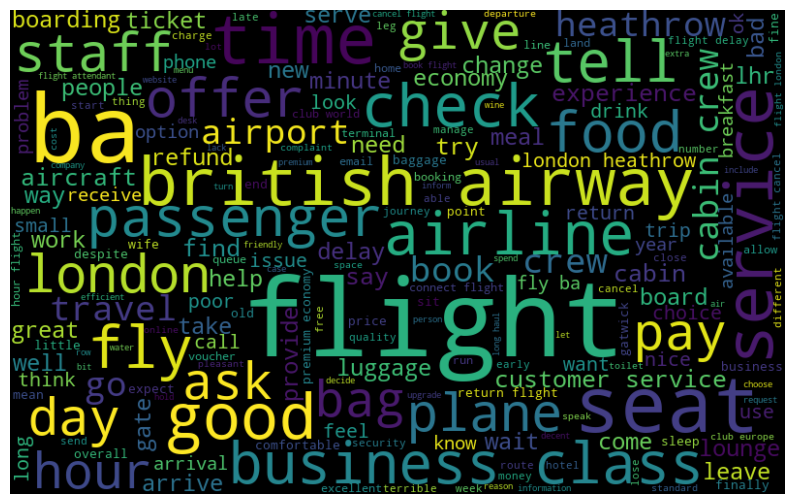

In [30]:
# generating wordcloud
from wordcloud import WordCloud

# Combine all words in the dataframe into a single string
all_words = ' '.join([text for text in df["cleaned_reviews"]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Display the wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
